In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
def get_max_factor(n_values, measured_times, complexity_type):
    if complexity_type == 'sqrt':
        theoretical = np.sqrt(n_values)
    else:  # linear
        theoretical = n_values
    factors = measured_times / theoretical
    return max(factors)

def get_min_time(measured_times):
    return min(measured_times)

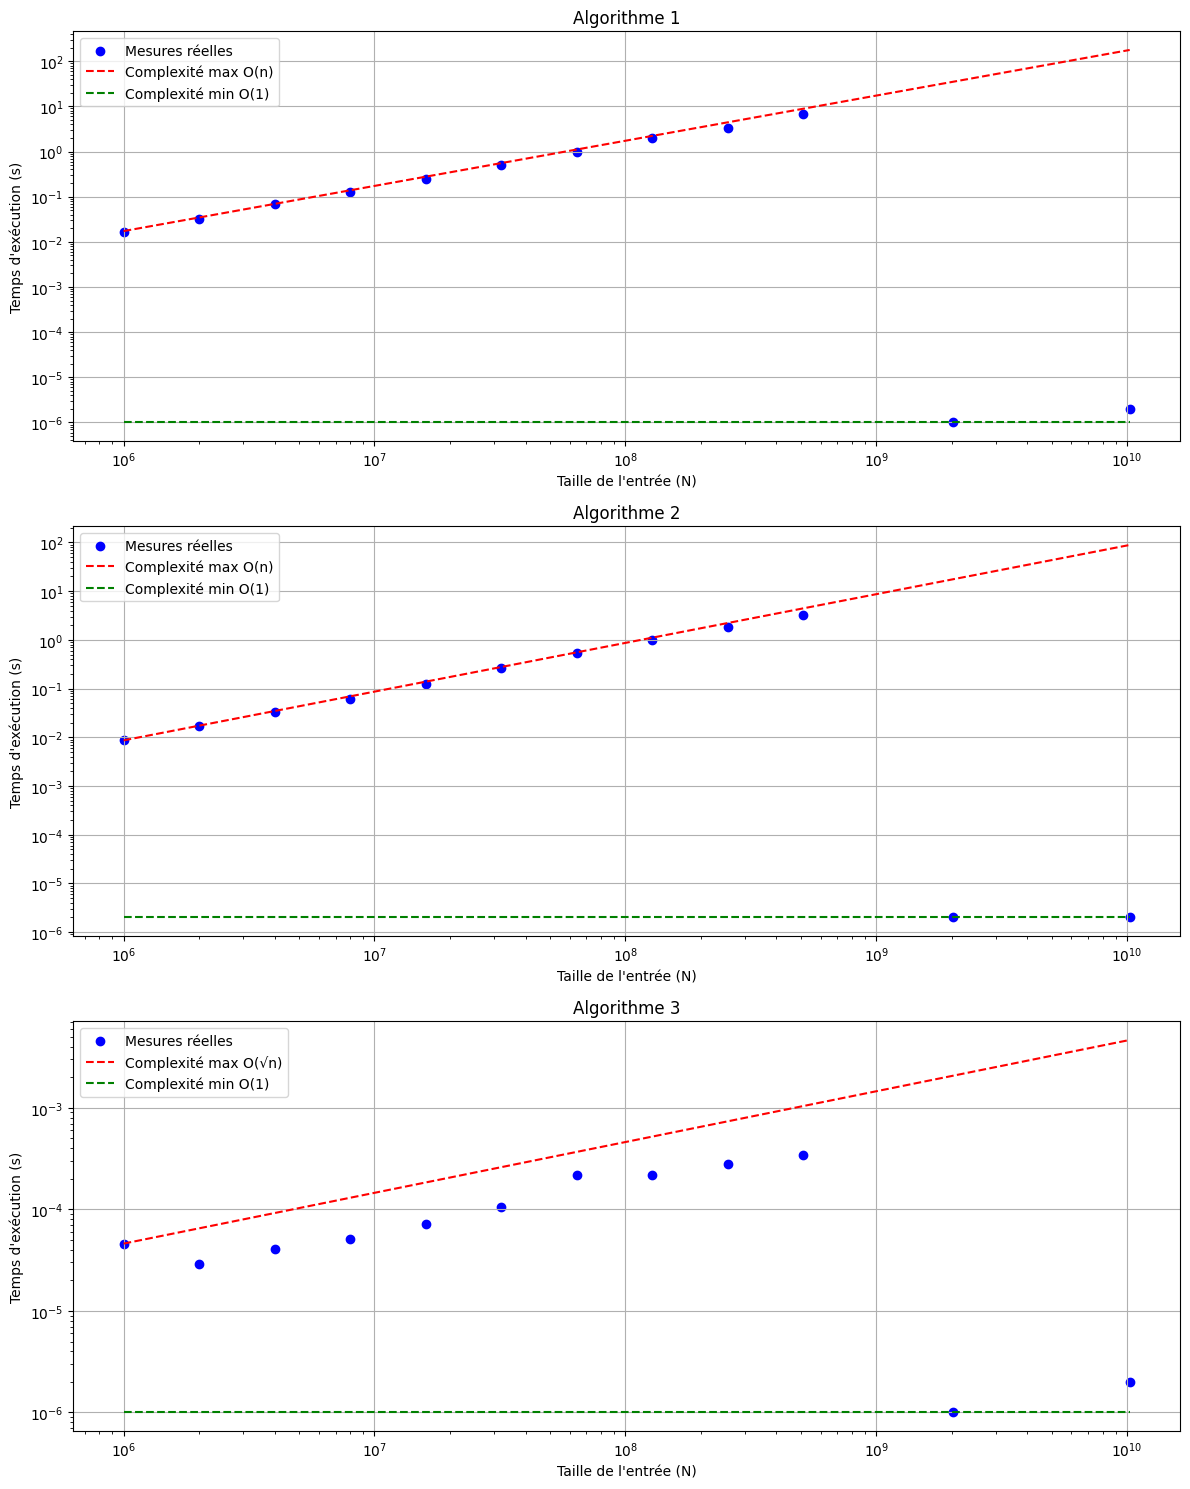

In [12]:
df = pd.read_csv('resultats.csv', header=None, 
                 names=['N', 'temps_algo1', 'temps_algo2', 'temps_algo3'])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

x_theory = np.linspace(min(df['N']), max(df['N']), 100)

# Graphique pour Algorithme 1 (O(n))
max_factor1 = get_max_factor(df['N'], df['temps_algo1'], 'linear')
min_time1 = get_min_time(df['temps_algo1'])

y_theory1_worst = max_factor1 * x_theory
y_theory1_best = np.full_like(x_theory, min_time1)

ax1.scatter(df['N'], df['temps_algo1'], color='blue', label='Mesures réelles')
ax1.plot(x_theory, y_theory1_worst, 'r--', label='Complexité max O(n)')
ax1.plot(x_theory, y_theory1_best, 'g--', label='Complexité min O(1)')
ax1.set_title('Algorithme 1')
ax1.set_xlabel('Taille de l\'entrée (N)')
ax1.set_ylabel('Temps d\'exécution (s)')
ax1.grid(True)
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

# Graphique pour Algorithme 2 (O(n))
max_factor2 = get_max_factor(df['N'], df['temps_algo2'], 'linear')
min_time2 = get_min_time(df['temps_algo2'])

y_theory2_worst = max_factor2 * x_theory
y_theory2_best = np.full_like(x_theory, min_time2)

ax2.scatter(df['N'], df['temps_algo2'], color='blue', label='Mesures réelles')
ax2.plot(x_theory, y_theory2_worst, 'r--', label='Complexité max O(n)')
ax2.plot(x_theory, y_theory2_best, 'g--', label='Complexité min O(1)')
ax2.set_title('Algorithme 2')
ax2.set_xlabel('Taille de l\'entrée (N)')
ax2.set_ylabel('Temps d\'exécution (s)')
ax2.grid(True)
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')

# Graphique pour Algorithme 3 (O(√n))
max_factor3 = get_max_factor(df['N'], df['temps_algo3'], 'sqrt')
min_time3 = get_min_time(df['temps_algo3'])

y_theory3_worst = max_factor3 * np.sqrt(x_theory)
y_theory3_best = np.full_like(x_theory, min_time3)

ax3.scatter(df['N'], df['temps_algo3'], color='blue', label='Mesures réelles')
ax3.plot(x_theory, y_theory3_worst, 'r--', label='Complexité max O(√n)')
ax3.plot(x_theory, y_theory3_best, 'g--', label='Complexité min O(1)')
ax3.set_title('Algorithme 3')
ax3.set_xlabel('Taille de l\'entrée (N)')
ax3.set_ylabel('Temps d\'exécution (s)')
ax3.grid(True)
ax3.legend()
ax3.set_xscale('log')
ax3.set_yscale('log')

plt.tight_layout()

# Afficher le graphique
plt.show()

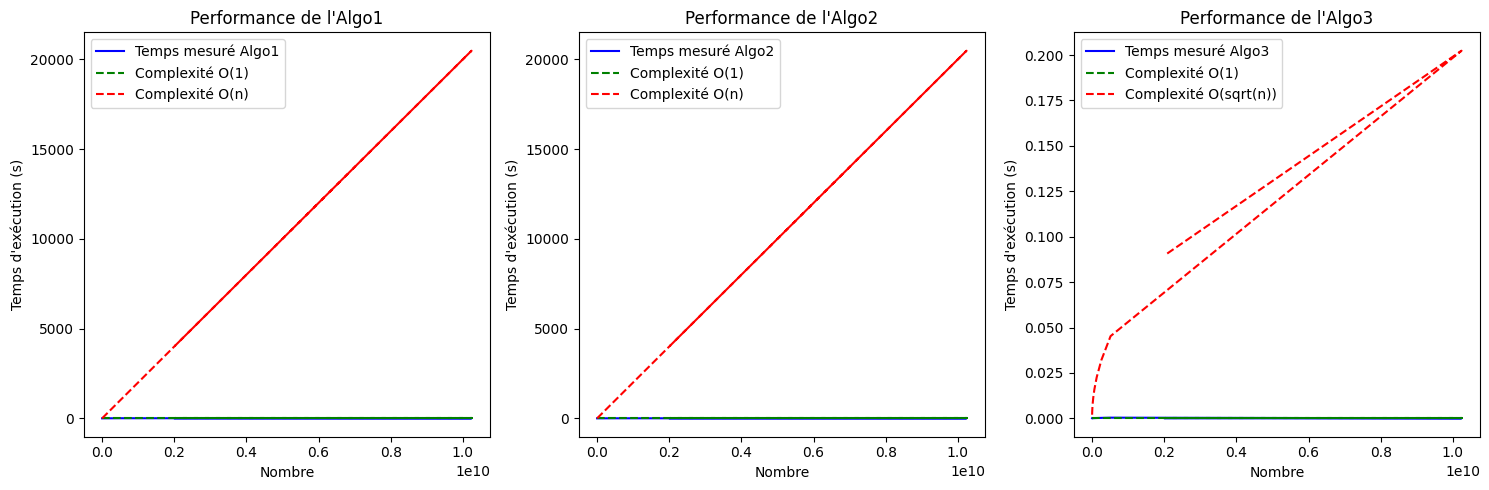

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données du fichier CSV
# Assurez-vous de remplacer 'resultats.csv' par le nom et chemin de votre fichier CSV.
data = pd.read_csv('resultats.csv')

# Supposons que le fichier contient les colonnes : "Nombre", "Texec1", "Texec2", "Texec3"
nombre = data['Nombre']
texec1 = data['Texec1']
texec2 = data['Texec2']
texec3 = data['Texec3']

# Déterminer le temps d'exécution d'une instruction (en supposant que c'est le temps moyen minimum mesuré)
# temps_instruction = min(min(texec1), min(texec2), min(texec3)) / len(nombre)
temps_instruction = 0.000002

# Générer les complexités théoriques
# Complexité pour algo1 : O(n)
complexite_algo1_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo1_max = [temps_instruction * n for n in nombre]  # O(n)

# Complexité pour algo2 : O(n/2), donc reste O(n) pour l'estimation
complexite_algo2_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo2_max = [temps_instruction * n for n in nombre]  # O(n)

# Complexité pour algo3 : O(sqrt(n))
complexite_algo3_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo3_max = [temps_instruction * np.sqrt(n) for n in nombre]  # O(sqrt(n))

# Tracer les résultats
plt.figure(figsize=(15, 5))

# Plot pour Algo1
plt.subplot(1, 3, 1)
plt.plot(nombre, texec1, label="Temps mesuré Algo1", color='blue')
plt.plot(nombre, complexite_algo1_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo1_max, label="Complexité O(n)", linestyle='--', color='red')
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo1")
plt.legend()

# Plot pour Algo2
plt.subplot(1, 3, 2)
plt.plot(nombre, texec2, label="Temps mesuré Algo2", color='blue')
plt.plot(nombre, complexite_algo2_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo2_max, label="Complexité O(n)", linestyle='--', color='red')
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo2")
plt.legend()

# Plot pour Algo3
plt.subplot(1, 3, 3)
plt.plot(nombre, texec3, label="Temps mesuré Algo3", color='blue')
plt.plot(nombre, complexite_algo3_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo3_max, label="Complexité O(sqrt(n))", linestyle='--', color='red')
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo3")
plt.legend()

plt.tight_layout()
plt.show()


1e-06


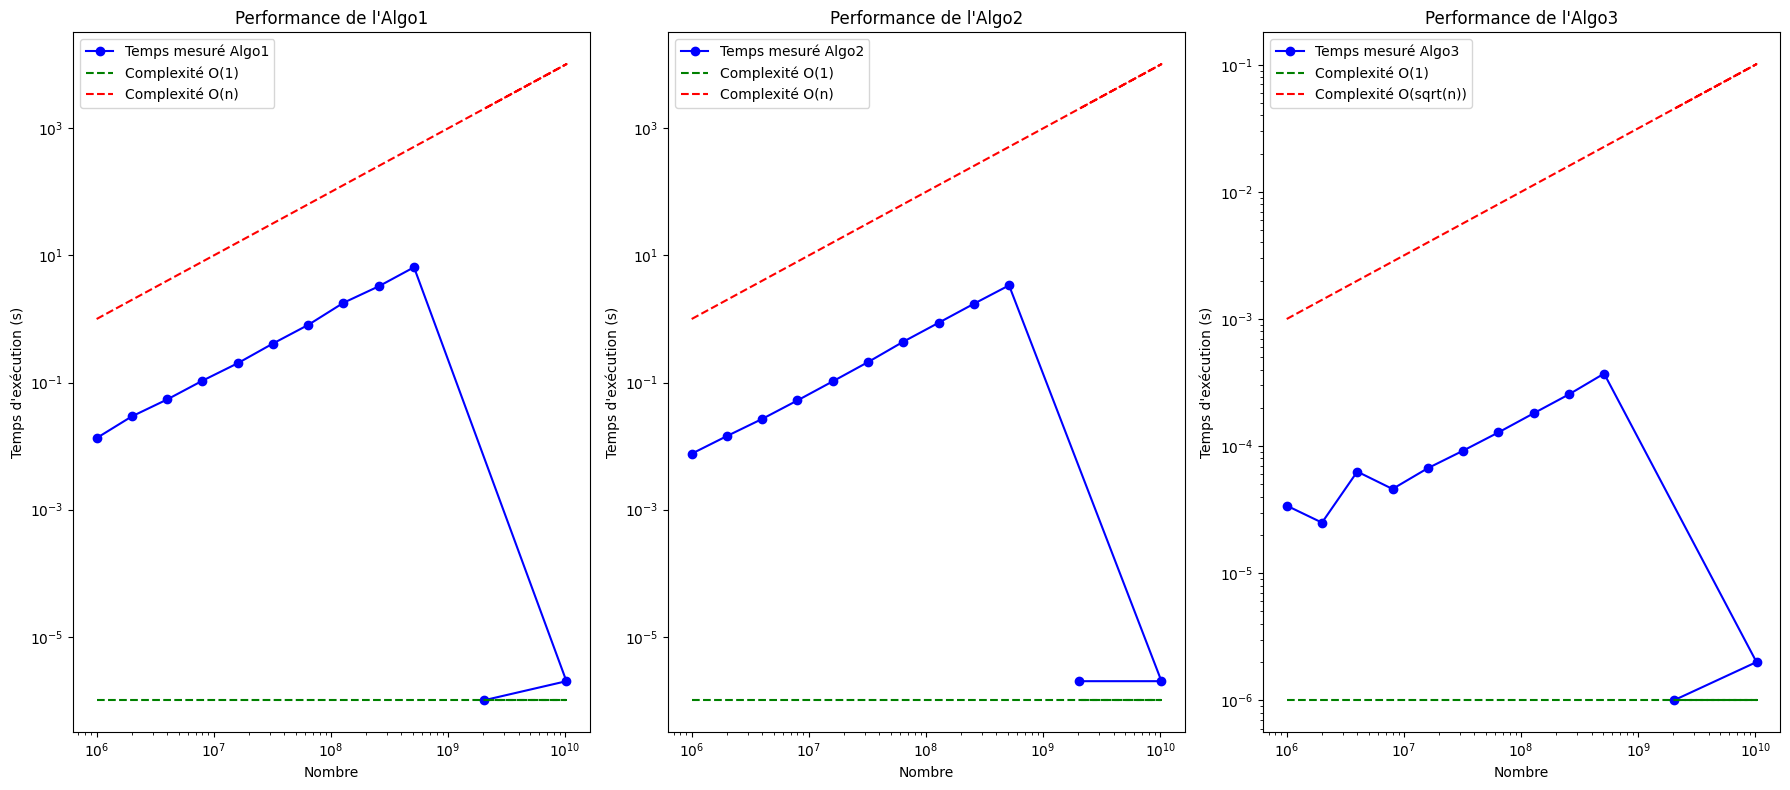

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données du fichier CSV
# Remplacez 'resultats.csv' par le chemin de votre fichier
data = pd.read_csv('resultats.csv')

# Supposons que le fichier contient les colonnes : "Nombre", "Texec1", "Texec2", "Texec3"
nombre = data['Nombre']
texec1 = data['Texec1']
texec2 = data['Texec2']
texec3 = data['Texec3']

# Temps d'exécution d'une instruction (en supposant qu'il s'agit du temps moyen minimum mesuré)
# temps_instruction = min(min(texec1), min(texec2), min(texec3)) / len(nombre)
temps_instruction = 0.000001
print(temps_instruction)

# Générer les complexités théoriques
# Complexité pour algo1 : O(n)
complexite_algo1_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo1_max = [temps_instruction * n for n in nombre]  # O(n)

# Complexité pour algo2 : O(n/2), donc reste O(n) pour l'estimation
complexite_algo2_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo2_max = [temps_instruction * n for n in nombre]  # O(n)

# Complexité pour algo3 : O(sqrt(n))
complexite_algo3_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo3_max = [temps_instruction * np.sqrt(n) for n in nombre]  # O(sqrt(n))

# Tracer les résultats
plt.figure(figsize=(18, 8))

# Plot pour Algo1
plt.subplot(1, 3, 1)
plt.plot(nombre, texec1, label="Temps mesuré Algo1", color='blue', marker='o')
plt.plot(nombre, complexite_algo1_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo1_max, label="Complexité O(n)", linestyle='--', color='red')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo1")
plt.legend()

# Plot pour Algo2
plt.subplot(1, 3, 2)
plt.plot(nombre, texec2, label="Temps mesuré Algo2", color='blue', marker='o')
plt.plot(nombre, complexite_algo2_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo2_max, label="Complexité O(n)", linestyle='--', color='red')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo2")
plt.legend()

# Plot pour Algo3
plt.subplot(1, 3, 3)
plt.plot(nombre, texec3, label="Temps mesuré Algo3", color='blue', marker='o')
plt.plot(nombre, complexite_algo3_min, label="Complexité O(1)", linestyle='--', color='green')
plt.plot(nombre, complexite_algo3_max, label="Complexité O(sqrt(n))", linestyle='--', color='red')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo3")
plt.legend()

plt.tight_layout()
plt.show()


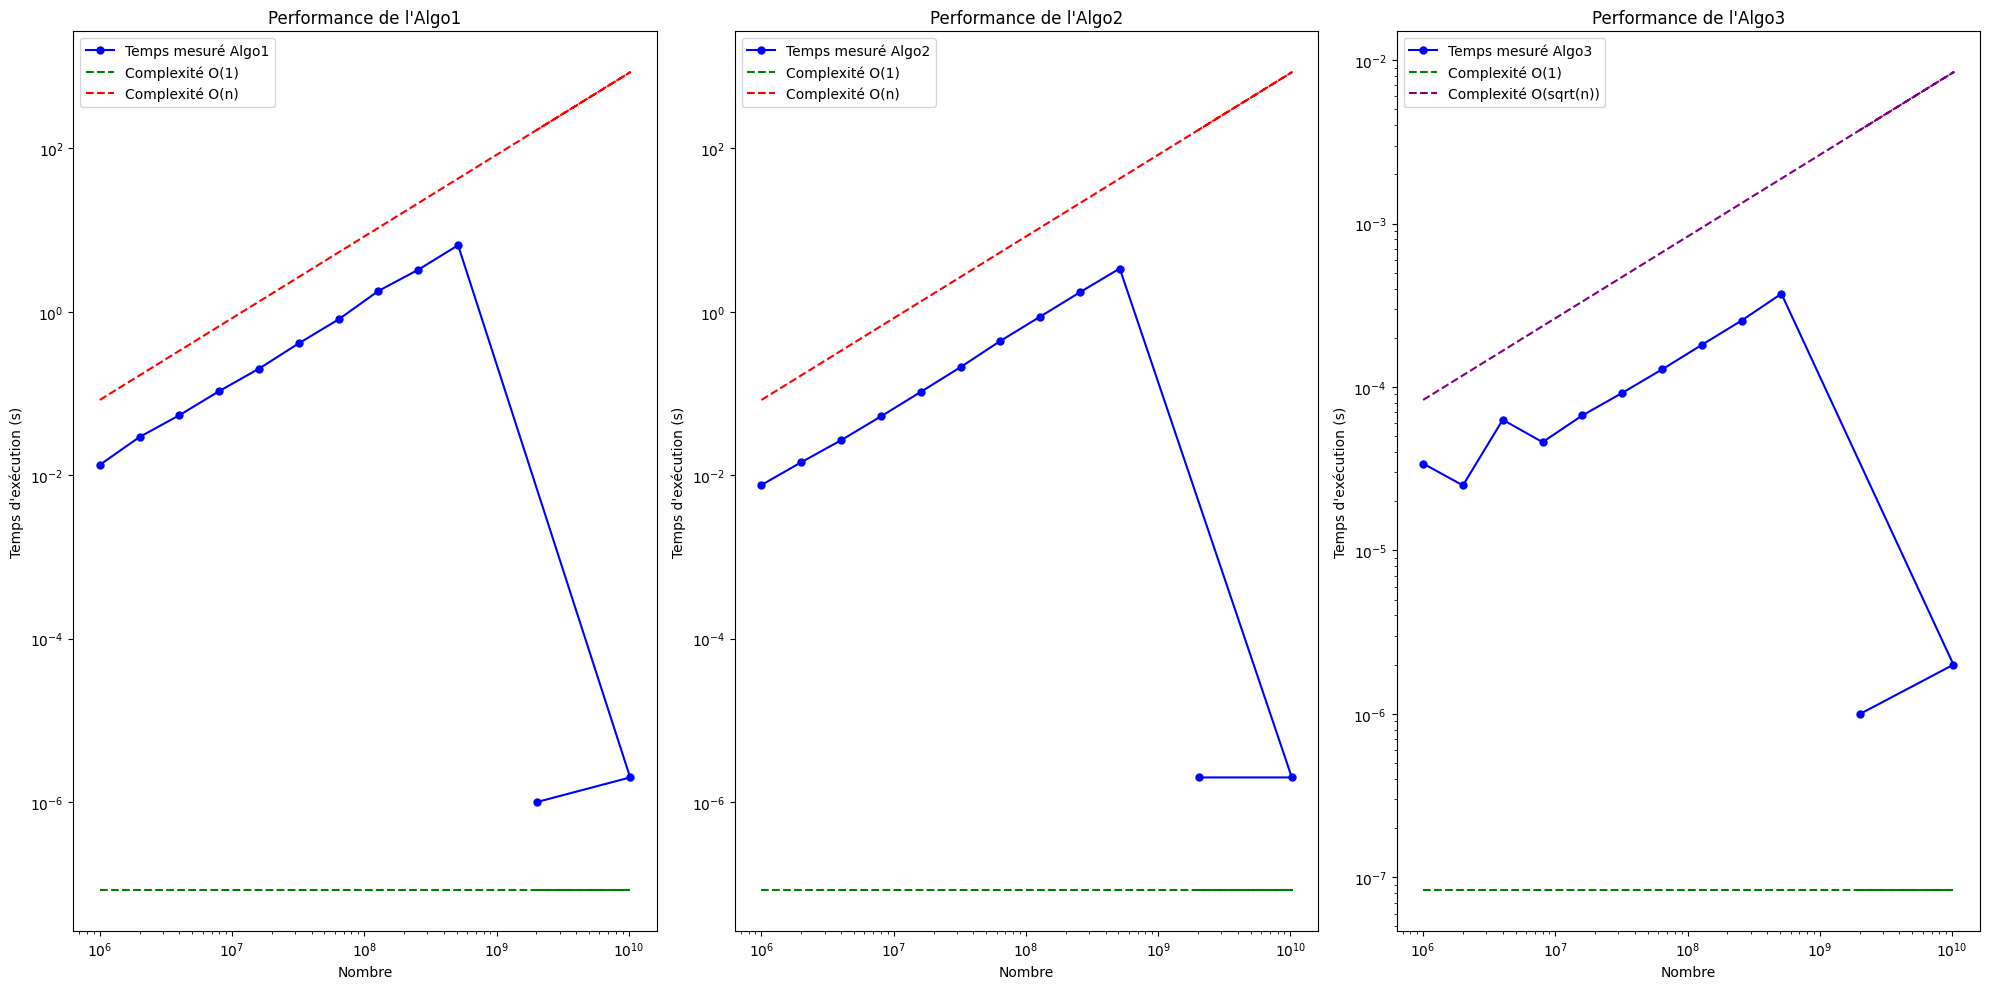

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données du fichier CSV
# Remplacez 'resultats.csv' par le chemin de votre fichier
data = pd.read_csv('resultats.csv')

# Supposons que le fichier contient les colonnes : "Nombre", "Texec1", "Texec2", "Texec3"
nombre = data['Nombre']
texec1 = data['Texec1']
texec2 = data['Texec2']
texec3 = data['Texec3']

# Temps d'exécution d'une seule instruction (en utilisant le minimum observé)
temps_instruction = min(min(texec1), min(texec2), min(texec3)) / len(nombre)

# Complexités théoriques
# Algo1 : O(n)
complexite_algo1_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo1_max = [temps_instruction * n for n in nombre]  # O(n)

# Algo2 : O(n), même complexité pour estimation
complexite_algo2_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo2_max = [temps_instruction * n for n in nombre]  # O(n)

# Algo3 : O(sqrt(n))
complexite_algo3_min = [temps_instruction for _ in nombre]  # O(1)
complexite_algo3_max = [temps_instruction * np.sqrt(n) for n in nombre]  # O(sqrt(n))

# Tracer les résultats avec des améliorations visuelles
plt.figure(figsize=(20, 10))

# Plot pour Algo1
plt.subplot(1, 3, 1)
plt.plot(nombre, texec1, label="Temps mesuré Algo1", color='blue', marker='o', markersize=5, linewidth=1.5)
plt.plot(nombre, complexite_algo1_min, label="Complexité O(1)", linestyle='--', color='green', linewidth=1.5)
plt.plot(nombre, complexite_algo1_max, label="Complexité O(n)", linestyle='--', color='red', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo1")
plt.legend()

# Plot pour Algo2
plt.subplot(1, 3, 2)
plt.plot(nombre, texec2, label="Temps mesuré Algo2", color='blue', marker='o', markersize=5, linewidth=1.5)
plt.plot(nombre, complexite_algo2_min, label="Complexité O(1)", linestyle='--', color='green', linewidth=1.5)
plt.plot(nombre, complexite_algo2_max, label="Complexité O(n)", linestyle='--', color='red', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo2")
plt.legend()

# Plot pour Algo3
plt.subplot(1, 3, 3)
plt.plot(nombre, texec3, label="Temps mesuré Algo3", color='blue', marker='o', markersize=5, linewidth=1.5)
plt.plot(nombre, complexite_algo3_min, label="Complexité O(1)", linestyle='--', color='green', linewidth=1.5)
plt.plot(nombre, complexite_algo3_max, label="Complexité O(sqrt(n))", linestyle='--', color='purple', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre")
plt.ylabel("Temps d'exécution (s)")
plt.title("Performance de l'Algo3")
plt.legend()

plt.tight_layout()
plt.show()
